# Análisis General del Impacto de Desastres Hidrológicos: Tendencias (2010-2024)

**1. Importamos el archivo de la base de datos**


In [ ]:
import pandas as pd

df = pd.read_excel("../database/data_no_procesada/database_2010_2024.xlsx")


df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2009-0595-IND,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,GLIDE:CW-2010-000013,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,71.563596,"[{""adm1_code"":1489,""adm1_name"":""Delhi""},{""adm1...",2010-08-04,2023-09-25
1,2010-0002-TJK,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,GLIDE:EQ-2010-000001,NaN,TJK,...,NaN,NaN,NaN,NaN,1500.0,2096.0,71.563596,"[{""adm2_code"":37581,""adm2_name"":""Vanchskiy""}]",2010-02-03,2023-09-25
2,2010-0003-SLB,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,USGS:usp000h5np,NaN,SLB,...,NaN,NaN,NaN,NaN,NaN,NaN,71.563596,"[{""adm2_code"":25652,""adm2_name"":""Administrativ...",2014-05-12,2023-09-25
3,2010-0004-BGD,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,71.563596,NaN,2010-01-05,2023-09-25
4,2010-0005-IND,No,tec-tra-rai-rai,Technological,Transport,Rail,Rail,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,71.563596,NaN,2010-01-05,2023-09-25


**2. Apartamos las columnas que necesitamos.**

In [ ]:
# Mantener solo las variables mencionadas a continuacion.

columns_to_keep = ['Start Year', 'Start Month', 'Start Day',
    'Country', 'Region', 'Location', 'Magnitude',
    "Disaster Subgroup", 'Total Damage (\'000 US$)', 'Total Deaths' ]
df = df[columns_to_keep]

# Mostramos los primeros 5 elementos para identificar que se realizo el primer Filtro
df.head()

,Start Year,Start Month,Start Day,Country,Region,Location,Magnitude,Disaster Subgroup,Total Damage ('000 US$),Total Deaths
0,2010,1.0,2.0,India,Asia,"Srinagar city ('72808' district, '40424' Jammu...",-9.0,Meteorological,NaN,100.0
1,2010,1.0,2.0,Tajikistan,Asia,"Uskrogh, Rogh, Payshanbeobod, Gishkhun, Dashti...",5.4,Geophysical,1500.0,NaN
2,2010,1.0,3.0,Solomon Islands,Oceania,Administrative unit not available,7.1,Geophysical,NaN,NaN
3,2010,1.0,1.0,Bangladesh,Asia,Kanaipur road,NaN,Transport,NaN,17.0
4,2010,1.0,2.0,India,Asia,NaN,NaN,Transport,NaN,10.0


**3. Filtramos los Desastres Hidrológicos**

In [ ]:
df = df[df["Disaster Subgroup"] == "Hydrological"]

df.head()

,Start Year,Start Month,Start Day,Country,Region,Location,Magnitude,Disaster Subgroup,Total Damage ('000 US$),Total Deaths
6,2010,1.0,NaN,Burundi,Africa,"Gatumba village (Mutimbuzi district, Bujumbura...",NaN,Hydrological,NaN,NaN
8,2010,1.0,4.0,Pakistan,Asia,Administrative unit not available district (Ja...,NaN,Hydrological,18000.0,19.0
15,2010,1.0,14.0,Philippines,Asia,"Jabonga, Las Nieves, Santiago areas (Agusan de...",NaN,Hydrological,22.0,2.0
16,2010,1.0,18.0,Egypt,Africa,"El Arish 1 district (North Sinai province), Ra...",226100.0,Hydrological,NaN,12.0
17,2010,1.0,19.0,Israel,Asia,Southern District province,NaN,Hydrological,NaN,2.0


**4. Con la siguiente funcion determinamos la limpieza que se realizó.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2685 entries, 6 to 8400
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Start Year               2685 non-null   int64  
 1   Start Month              2684 non-null   float64
 2   Start Day                2542 non-null   float64
 3   Country                  2685 non-null   object 
 4   Region                   2685 non-null   object 
 5   Location                 2662 non-null   object 
 6   Magnitude                506 non-null    float64
 7   Disaster Subgroup        2685 non-null   object 
 8   Total Damage ('000 US$)  706 non-null    float64
 9   Total Deaths             2053 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 230.7+ KB


**5. Para finalizar ajustamos el índice de manera organizada para tener coherencia en la data.**

In [ ]:
indices = list(range(1,2686))
df.index = indices
df.head()

,Start Year,Start Month,Start Day,Country,Region,Location,Magnitude,Disaster Subgroup,Total Damage ('000 US$),Total Deaths
1,2010,1.0,NaN,Burundi,Africa,"Gatumba village (Mutimbuzi district, Bujumbura...",NaN,Hydrological,NaN,NaN
2,2010,1.0,4.0,Pakistan,Asia,Administrative unit not available district (Ja...,NaN,Hydrological,18000.0,19.0
3,2010,1.0,14.0,Philippines,Asia,"Jabonga, Las Nieves, Santiago areas (Agusan de...",NaN,Hydrological,22.0,2.0
4,2010,1.0,18.0,Egypt,Africa,"El Arish 1 district (North Sinai province), Ra...",226100.0,Hydrological,NaN,12.0
5,2010,1.0,19.0,Israel,Asia,Southern District province,NaN,Hydrological,NaN,2.0


**6.Guardamos el archivo de la data**

In [ ]:
df.to_excel("../database/data_procesada/database_2010_2024.xlsx")

# Gráficas de tendencias

Importamos la data procesada para trabajar con los datos limpios.

In [ ]:
import pandas as pd

df = pd.read_excel("../database/data_procesada/database_2010_2024.xlsx")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2685 non-null   int64  
 1   Start Year               2685 non-null   int64  
 2   Start Month              2684 non-null   float64
 3   Start Day                2542 non-null   float64
 4   Country                  2685 non-null   object 
 5   Region                   2685 non-null   object 
 6   Location                 2662 non-null   object 
 7   Magnitude                506 non-null    float64
 8   Disaster Subgroup        2685 non-null   object 
 9   Total Damage ('000 US$)  706 non-null    float64
 10  Total Deaths             2053 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 230.9+ KB


Hacemos una segunda importación pero esta vez de la libreria qué utilizaremos para gráficar

In [ ]:
import matplotlib.pyplot as plt

**1. Gráfica de Desastres Hidrológicos por Región**

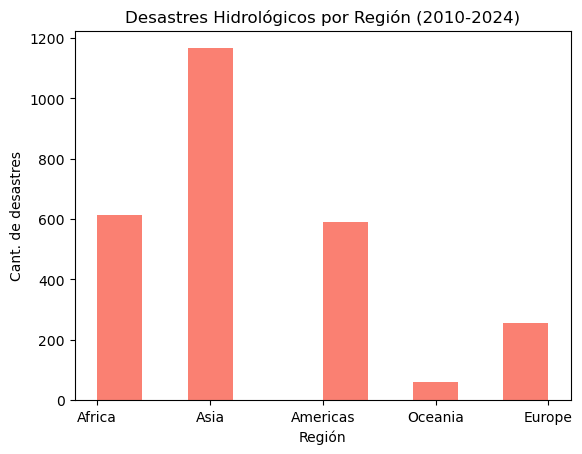

In [ ]:
# Gráfica de desastres hidrologicos por región
region = df["Region"]
plt.hist(region, color="#FA8072")
plt.title("Desastres Hidrológicos por Región (2010-2024)")
plt.ylabel("Cant. de desastres")
plt.xlabel("Región")
plt.show()

Como se puede observar en los resultados de esta gráfica, Asia es la región que más Desastres Hidrológicos obtuvo, con un total de casi 1.200 cantidad de desastres.

**2. Gráfica de Desastres Hidrológicos por Año**

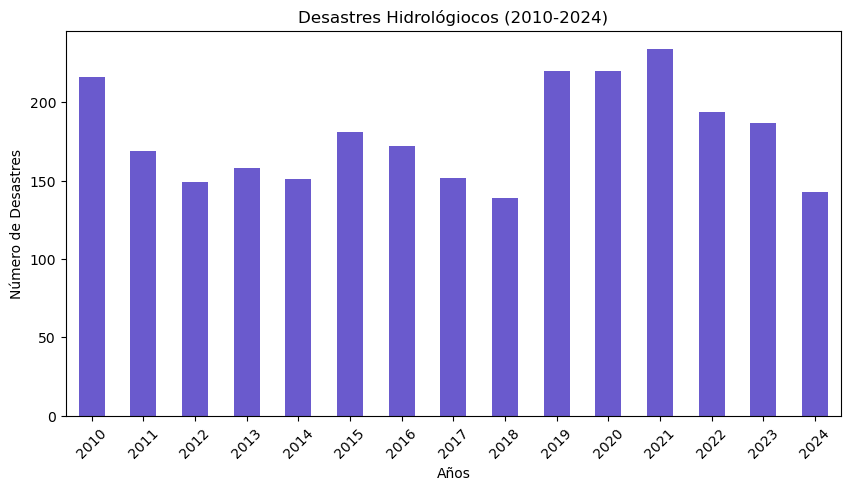

In [ ]:
# Agrupar los desastres por año
desastres_por_año = df.groupby('Start Year')['Unnamed: 0'].count()

# Crear la gráfica
plt.figure(figsize=(10, 5))
desastres_por_año.plot(kind='bar', color="#6A5ACD")
plt.title('Desastres Hidrológiocos (2010-2024)')
plt.xlabel('Años')
plt.ylabel('Número de Desastres')
plt.xticks(rotation=45)
plt.show()

La siguiente Gráfica demuestra que el 2010, 2019, 2020 y 2021 Sobrepasan los 200 números de desastres mientras que los demás están por debajo, el año con mayor cantidad de Desastres Hidrológicos fue en el 2021.

**3. Gráfica de Cantidad de Desastres Hidrológicos por País**



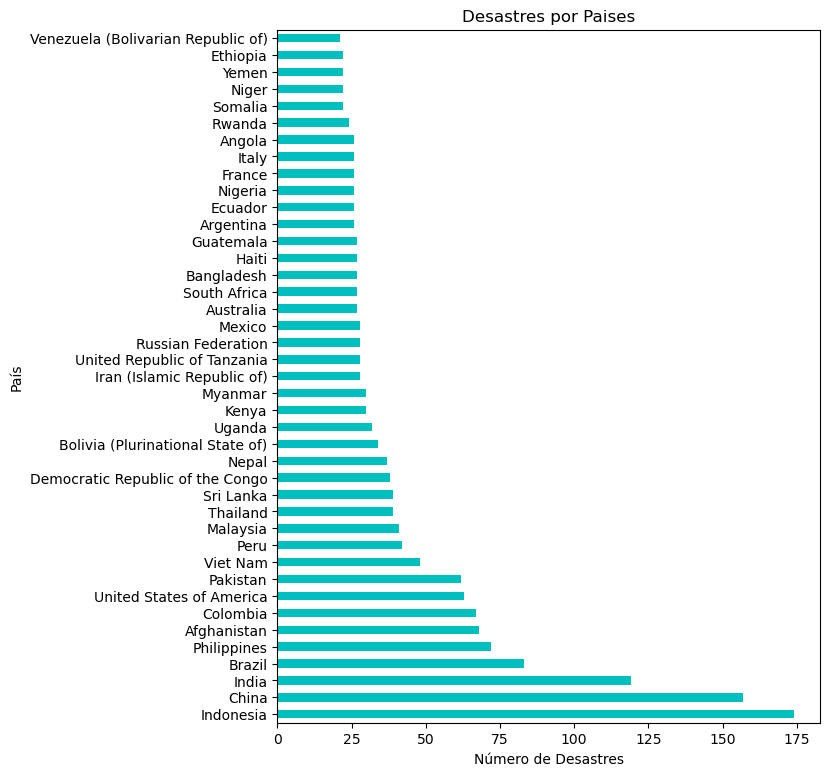

In [ ]:
# Conteo de desastres por país
conteo_desastres = df['Country'].value_counts()

# Filtrar los países con más de 30 desastres
conteo_desastres_filtrado = conteo_desastres[conteo_desastres > 20]

plt.figure(figsize=(7, 9))

# Crear la gráfica de barras horizontales
conteo_desastres_filtrado.plot(kind='barh', color="#00BFBF")

plt.title("Desastres por Paises")
plt.xlabel("Número de Desastres")
plt.ylabel("País")
plt.show()

Los 3 países con mayor cantidad de desastres hidrológicos fueron:

1. Indonesia
2. China
3. India

Pasaron de manera notoria los 75 número de desastres, esos tres países son pertenecientes a la región de Asia, confirmandonos qué la misma es la más propensa a que sucedan este tipo de desastre natural.

* ¿Por qué suele suceder esto?

Esto se debe a que en la región de Asia el cambio climático dá resultado al aumento de las temperaturas, relacionando a qué puedan suceder lluvias más intensas, olas de calor, fenómenos meteorológicos extremos y aumento del nivel del mar, lo cual dá contribución al aumento de la frecuencia e intensidad de las inundaciones.

# 2. Análisis de Patrones de las siguiente variables en desastres hidrológicos: Magnitud - Daños Económicos - Muertes  (2010-2024).

 **0. Carga del archivo de la base de datos, para leer los valores almacenados en Colab y posteriormente guardar en dicha unidad (Google Drive) la nueva información que se genere.**

In [ ]:
# 0. Lectura de la base de datos original, generada apartir del notebook que le antecede, periodo de tiempo 2010-2024
import pandas as pd

bd2 = pd.read_excel("../database/data_procesada/database_2010_2024.xlsx")

**I. Filtrado específico y limpiado de las variables a relacionar entre sí: (Pre-procesado de datos)**

In [ ]:
# 1. Lectura del archivo de la base de datos limpio, almacenado desde otra variable a trabajarse de forma Principal.

bd = pd.read_excel("../database/data_procesada/1_magnitud-dañosEco-Deaths.xlsx")

In [ ]:
# Ejecución por parte Angel, para establecer conexión con sus archivos de Google Drive.

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

bd = pd.read_excel("/content/drive/MyDrive/Base de datos/database_2010_2024.xlsx")
bd2 = pd.read_excel("/content/drive/MyDrive/Base de datos/1database_procesada_2010_2024.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 0.1 Filtrado y modificado de la información del archivo de la base de datos original, al formato con el cual se pretende trabajar (columnas, etiquetas, índice)
# (Para este caso en particular no se realiza limpiado de filas con valores NaN)


bd2 = bd2.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Dia", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud", "Total Deaths":"Muertes Totales", "Disaster Subgroup":"Clasificación"})

bd2 = bd2.drop(columns=["Unnamed: 0"])                    # Columna residual que especifica los índices por defecto del excel

bd2.index=range(len(bd2))                                 # Reestablecer el número que le corresponde al indice del nuevo df

bd2

,Año,Mes,Dia,País,Region,Location,Magnitud,Clasificación,Daños Económicos,Muertes Totales
0,2010,1.00,NaN,Burundi,Africa,"Gatumba village (Mutimbuzi district, Bujumbura...",NaN,Hydrological,NaN,NaN
1,2010,1.00,4.00,Pakistan,Asia,Administrative unit not available district (Ja...,NaN,Hydrological,"18,000.00",19.00
2,2010,1.00,14.00,Philippines,Asia,"Jabonga, Las Nieves, Santiago areas (Agusan de...",NaN,Hydrological,22.00,2.00
3,2010,1.00,18.00,Egypt,Africa,"El Arish 1 district (North Sinai province), Ra...","226,100.00",Hydrological,NaN,12.00
4,2010,1.00,19.00,Israel,Asia,Southern District province,NaN,Hydrological,NaN,2.00
...,...,...,...,...,...,...,...,...,...,...
2680,2024,10.00,4.00,India,Asia,Meghalaya,NaN,Hydrological,NaN,15.00
2681,2024,10.00,17.00,France,Europe,"Rhône, Loire, Haute-Loire, Lozère, Ardèche, Al...",NaN,Hydrological,NaN,NaN
2682,2024,9.00,23.00,Sierra Leone,Africa,Bumbuna dam in Bumbuna town (Tonkolili Distric...,NaN,Hydrological,NaN,NaN
2683,2024,10.00,22.00,South Africa,Africa,Eastern Cape province,NaN,Hydrological,NaN,10.00


In [ ]:
# 1.1 Filtrado y modificado de la información, Variable Principal, al formato con el cual se pretende trabajar (filas, columnas, etiquetas, índice)
# (Para este caso se limpiarán todas las filas de las columnas que no coincidan por tener valores no NaN y así trabajar de forma lineal o uniforme
# con los valores de las variables de estudio)
bd2 = pd.read_excel("/content/drive/MyDrive/Base de datos/1database_procesada_2010_2024.xlsx")


import datetime

bd = bd.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Dia", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud", "Total Deaths":"Muertes Totales", "Disaster Subgroup":"Clasificación"})

bd = bd.dropna()

bd['Dia'] = bd['Dia'].astype(int)                                                           # Los valores por defecto son float, se convierten a entero para poder hacer uso de datetime

bd['Muertes Totales'] = bd['Muertes Totales'].astype(int)                                   # Cambiar de valor float a entero de muertes, para su visualización adecuada

bd["Fecha"] = pd.to_datetime(bd[["Año", "Mes", "Dia"]].astype(str).agg('-'.join, axis=1))   # Transformar y unir a una sola columna el formato de fechas original con datetime.

bd = bd.drop(columns=["Año", "Mes", "Dia", "Unnamed: 0"])                                   # Eliminar las columnas sobrantes del proceso anterior.

bd.index=range(len(bd))                                                                     # restablecer el valor del indice original por el de la cantidad que corresponde a cada elemento de df

bd

,País,Region,Location,Magnitud,Clasificación,Daños Económicos,Muertes Totales,Fecha
0,Mexico,Americas,"Distrito Federal, Mexico city, Michoacan provi...",122621.00,Hydrological,16000.0,41,2010-01-26
1,Portugal,Europe,Funchal district (Ilha Da Madera province),483.00,Hydrological,1350000.0,43,2010-02-20
2,Colombia,Americas,"Sucre, Bolivar, Cordoba, Antioquia, Atlantico,...",1140146.00,Hydrological,1000000.0,418,2010-04-06
3,Sri Lanka,Asia,"Galle, Matara districts (Southern province), R...",19210.00,Hydrological,105000.0,28,2010-05-14
4,France,Europe,"Draguignan, Les Arcs, Figanières, Roquebrune s...",7700.00,Hydrological,1500000.0,25,2010-06-15
...,...,...,...,...,...,...,...,...
170,Kenya,Africa,"West Pokot, Elgeyo Marakwet, Kisumu, Homabay, ...",154389.90,Hydrological,10000.0,285,2020-04-18
171,Yemen,Asia,"Aden, Lahj, Taiz, Ad Dali’, Abyan, Hadramawt g...",18949.28,Hydrological,10000.0,10,2020-04-15
172,Ukraine,Europe,Verkhovyna District (Ivano-Frankivsk); Vyzhnyt...,33791.16,Hydrological,153861.0,3,2020-06-22
173,Japan,Asia,"Kumamoto Prefecture, Yatsushiro, and Hitoyoshi...",28547.82,Hydrological,5800000.0,82,2020-06-29


In [ ]:
# Los 2 DataFrame anteriormente limpiados, se generarán documentos .excels para continuar con el análisis de los datos en el siguiente notebook (parte 3)

bd.to_excel("magnitud-dañosEco-Deaths.xlsx")



In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

bd.describe()

,Magnitud,Daños Económicos,Muertes Totales,Fecha
count,175.00,175.00,175.00,175
mean,"167,883.22","1,376,486.54",116.55,2014-05-29 12:28:48
min,483.00,176.00,1.00,2010-01-26 00:00:00
25%,"20,269.00","22,000.00",9.00,2012-01-27 00:00:00
50%,"55,138.95","120,000.00",32.00,2013-12-27 00:00:00
75%,"154,581.55","600,000.00",67.00,2016-07-08 12:00:00
max,"2,643,786.00","40,000,000.00","6,054.00",2021-07-12 00:00:00
std,"318,254.76","4,844,264.63",489.56,NaN


**2. Interpretación de la estadística descriptiva de los datos obtenidos del archivo de la base de datos pre-procesada. Es decir, sólo de aquello que puede estudiarse en cojunto respecto a la magnitud, daños económicos y muertes totales:**

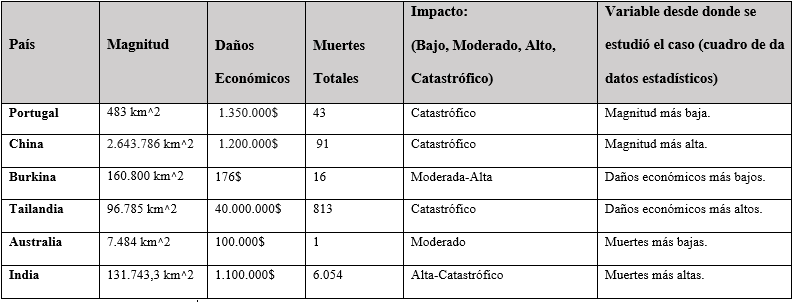


**A. Magnitud:** Su valor se lee en kilómetros cuadrados de afectaciones a áreas
por inundaciones y "movimientos en masa", como únicos desastres registrados en la categoria de hidrológicos. En la parte de movimiento en masa, se pueden categorizar como evento de deslizamientos de tierra, derrumbes o flujo de escombros.

**En la lectura de los resultados de las estadisticas para magnitud:** se tiene que el valor mínimo es de 483 km^2, lo cual indica a priori un evento de magnitud relativamente bajo, en comparación al resto. Aunque no por ello menos importante, como breve detalle ésta eventualidad sucedio en Portugal y dejo una cifra de muertes de 43 personas. Además de un daño económico de 1.350.000$ (millones de dólares), grabado como uno de los eventos más catastroficos en la historia de esta zona.

Para su ubicación específica "Funchal district (Ilha Da Madera province)", se trata de una isla "montañosa y volcánica", propensa a deslizamientos e inundaciones, debido a su "topografía y fuertes lluvias". Aunque los daños se valoraron en esas cifras, puede que no se incluyan todos las perdidas indirectas, que van desde la propiedades, infraestructuras de la comunidad y servicios esenciales.

**En el valor de la media** 167.883,22  km^2, sugiere que en general los eventos registrados tienden a ser de magnitud moderada a alta, dependiendo de donde sea su afectacción regular. Para hacernos una idea, se tiene por ejemplo, que el área de Italia es de 302.073 km^2, por lo que es una consideración bastante significativa a los sitios que son más vulnerables a éstos fenómenos de tal magnitud, resultado de mayor, menor o masivos los daños en comparación.

**El mayor valor** de 2.643.786,00 km^2, por si sólo hace enfasis en representar un tipo de evento muy en particular, es una magnitud extremadamente alta y catastrófica si se ve particularizada. Por ejemplo, Argentina mide alrededor de 2.780.400 km^2, siendo catastrófico incluso para China que fue donde sucedió el incidente, dejando una cantidad de bajas de 91 personas, muy por debajo de lo que pudo haber sido en cualquier otro sitio, aunque dejando perdida economicas de 1.200.000$ (millones de dólares). China tiene un área de aproximadamente 9.596.900 km^2, pero logra apreciarse indirectamente a estos análisis, la influencia de otros factores externos en la obtención de estos resultados positivos, para su población a desastres tan masivos, aunque no tanto a nivel económico.

**Desviación estandar** de 318.254,76 km^2, es significativamente alta recapitulando lo anterior. Es decir, refleja una gran dispersión en estos valores, y que hay una amplia variedad de eventos, desde los de más baja magnitud hasta los de magnitud excepcional.


---




**B. Daños Económicos:** Estos datos se miden o leen en miles de dolares, que de la mano con la ubicación exacta del incidente, proporcionará información sobre la cantidad "real" de daños a ecosistemas y/o infraestructuras. La "reparación" de esto daños, tiene que salir de un presupuesto especial, para reconstrucciones y arreglos que no siempre será posible o factibles. Por lo que la toma de previsiones deben considerarse mucho antes, para alivianar tales efectos.  

**Comenzando con la lectura de las estadisticas para Daños Económicos:** Se tiene que el valor más bajo registrado es 176$ (dólares), indicando por si sólo que tal evento tuvo un impacto económico extremadamente bajo en comparación al resto de zonas, tomando también en cuenta que su magnitud fue de 160.000 km^2, y que dejó un total de 16 muertes. Sin embargo, ésto no es un indicativo totalmente preciso, para evaluar el verdadero daño económico sufrido por el país Burkina Faso, de "Sub-Saharan Africa".

Su ubicación es un área que vive en condiciones económicas donde la mayor parte de la población cuentan con ingresos bajos o incluso en condiciones de pobreza y que bajo esas consideraciones esa cantidad de pérdidas puede aún así representar una valuación mediana de recursos para dicha comunidad, en la que también puede destacarse que está ciertamente preparada para desastres de tal magnitud o afectando a su paso en áreas poco pobladas. Por lo que se puede estimar que en la mejora de sus condiciones de vida y medidas preventivas por parte de las autoridades, podría reducirse todavía más sus afectacciones.

**La media de** 1.376.486,54$ (milones de dólares) habla de que general, los eventos registrados tienden a ser de impacto bastante alto, además de como podría aplicar lo anteriormente recapitulado en Burkina, pudiendose dar en otra serie de casos. Por lo que este aspecto variará drasticamente, estos son cantidades de por sí elevadas y no debe tomarse a la ligera, a la hora de conocer el nivel de afectacción sufrido.

**El mayor valor de** 40.000.000,00$, muestra una catastrofe devastadadora a gran escala, directamente sucedido en Tailandia en "South-eastern Asia", que no sólo se considera un impacto económico exttremo en lo que se refiere el desarrollo de este país y con respecto al resto, sino que este desastre abarcó tanto área urbanas, como rurales, impactando en la vida de muchas personas incluyendo comunidades más vulnerables que dependían de agricultura y otros medios de vida.

 Por lo que la recuperación pudo ser un desafio a largo plazo, ya que no todo fuese sido recuperado totalmente, generando otros tipo de perdida a mediano plazo, y si tomamos en cuenta la magnitud de sólo 96.785 km^2, que como se pudo apreciar en los anteriores puntos, no se acerca en nada al valor máximo de esa variable y que para la cantidad de este caso, se clasifica como daño moderado o alto. Pero que resultó ser extremadamente peor de lo que se pudo estimar, tomandose de referencia sólo ese dato. Además de una baja de 813 personas.

**La desviación estándar de** 4.844.264,63$ realmente es alta para cualquier sitio, lo que refleja una enorme variabilidad en los valores de daños económicos, y esto implica que hay una amplia gama de eventos, que nuevamente independiente de la cantidad, es lo sufrido para donde haya sido el desastre.



---

**C. Muertes Totales:** se trata de la cantidad total de bajas humanas por evento, que como ya se ha estudiado varía tanto para eventos de magnitud catastrófica, alta, moderada y baja, pudiendo ser de mayor o de menor impacto. Ya dependiendo de otros factores, como podría ser el nivel de preparación del país en cuestión a este tipo de eventos a lo largo del tiempo. Pero ese aspecto pasa a ser un estudio a parte del contexto y todo lo que contribuye a que eso sea así o no y su evolución en el tiempo, para cada país de interés y que también contribuye a la visualización precisa de éstos datos, para análisis en mayor profundidad.

**La Lectura de la estadistica para Muertes:** El valor mínimo es de 1 (uno), este caso tuvo una magnitud de 7.484 km^2 y daños económicos de 100.000,00$ el incidente tuvo lugar en Australia - "Wellington province". Para esta ubicación de acuedo a lo registrado fue una inundación provocada por fuertes lluvias que afectaron la región durante un periodo de tiempo corto, saturando el suelo y causando el desbordamiento de ríos, daños a infraestructuras, incluyendo carreteras, puentes y desarrollo de actividades agrícolas en la región. Por lo que en conjunto la magnitud, con la cantidad de daños económicos y muertes, sugiere que el desastre fue de nivel moderado para la zona en estos aspectos, mitigansose bastante sus consecuencias en su contexto en particular.

**La media de** 116, este valor sugierre que para el promedio de bajas humanas se tiene un impacto humano a analizarse mejor para cada caso en particular y así tomar previsiones para que esa cifra sea todavia menor e igualmente en sus otros aspectos.

**EL valor máximo de** 6.054 personas, es una cantidad bastante alarmante, más todavía si se toma en cuenta que para ese incidente fue de una magnitud de 131.743,4 km^2, sumando los daños económicos que ascienden a 1.100.000,00$. Esto tuvo lugar en la India. La cantidad de daños es evidentemente, un golpe devastador para las familias y economía de esas regiones, su ubicación es de alcance geográfico extenso, afectando ecosistemas que van desde área rurales, agrícolas hasta centro urbanos. Por lo que en éste es uno de los casos que puede evaluarse que la magnitud, daños económicos y muertes refleja una realidad o relación lineal.  

**La desviación estandar de** 489 es alta, reflejando una gran variabilidad en el número de muertes, nuevamente esto implica que hay una amplia gama de eventos, desde aquellos con pocas victimas, hasta otros un número de muertes devastador.


---

En resumen, éste breve análisis de los datos estadisticos, muestra que en el conjunto de información, se registra una gran diversidad de eventos con una amplia variación en lo que respecta magnitud, daños económicos y muertes totales. Y no sólo en el aspecto de los valores, sino en el impacto objetivo se que vivenció en el país, con todo lo que dispone o no para hacerle frente. Por lo que no siempre los números podrán reflejar la realidad en concreto, igualemente frente otros números y desastres.

**III. Visualización de los datos: Análisis de datos:**

**3.1 Gráfica de cantidad de datos para cada variable de estudio, del archivo de la base de datos, sin el pre-procesado (Magnitud, Daños Económicos, Muertes)**

In [ ]:
magnitud = bd2["Magnitud"]
daños = bd2["Daños Económicos"]
muertes = bd2["Muertes Totales"]
fecha = bd2['Año']

Cantidad de datos válidos para magnitud: 506


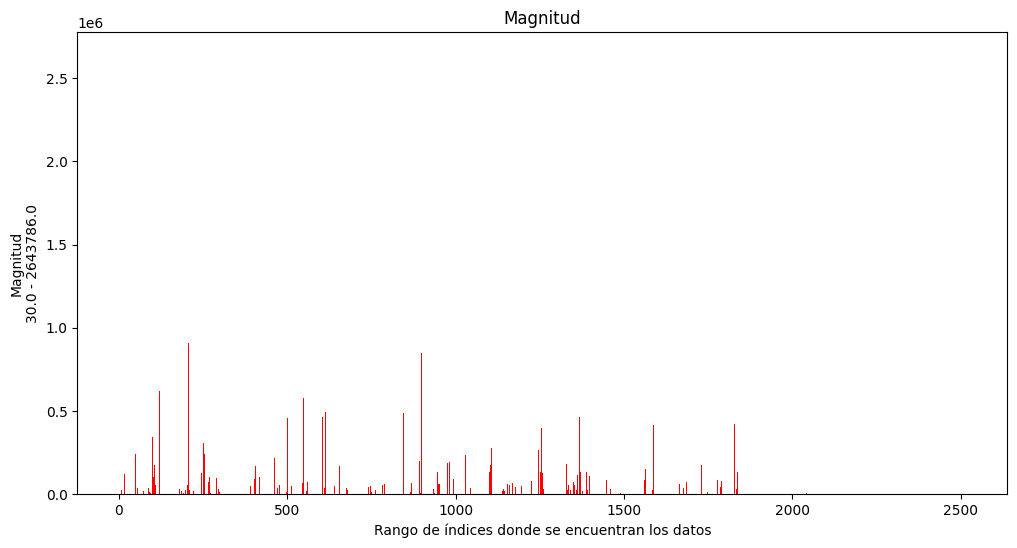

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(12, 6))
print(f"Cantidad de datos válidos para magnitud: {magnitud.count()}")
ax.bar(range(len(magnitud)), magnitud)
ax.set_title('Magnitud')
ax.set_xlabel('Rango de índices donde se encuentran los datos')
ax.set_ylabel(f'Magnitud\n{magnitud.min()} - {magnitud.max()}')
ax.bar(range(len(magnitud)), magnitud, color='red')
plt.show()


Cantidad de datos válidos para Daños Econónmicos: 706


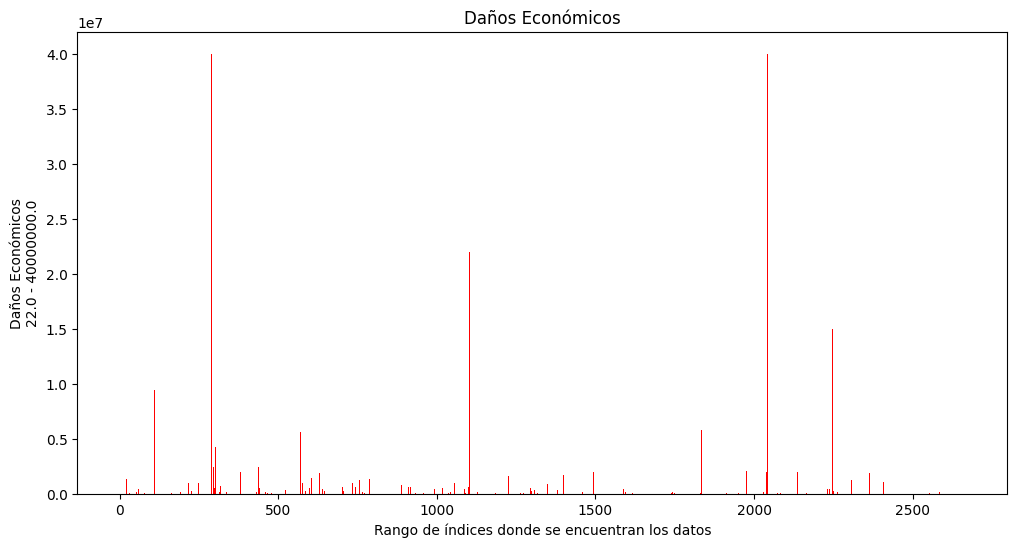

In [ ]:
# Gráfico de Daños Económicos
fig, ax = plt.subplots(figsize=(12, 6))
print(f"Cantidad de datos válidos para Daños Econónmicos: {daños.count()}")
ax.bar(range(len(daños)), daños)
ax.set_title('Daños Económicos')
ax.set_xlabel('Rango de índices donde se encuentran los datos')
ax.set_ylabel(f'Daños Económicos\n{daños.min()} - {daños.max()}')
ax.bar(range(len(daños)), daños, color='red')
plt.show()

Cantidad de datos válidos para Muertes totales: 2053


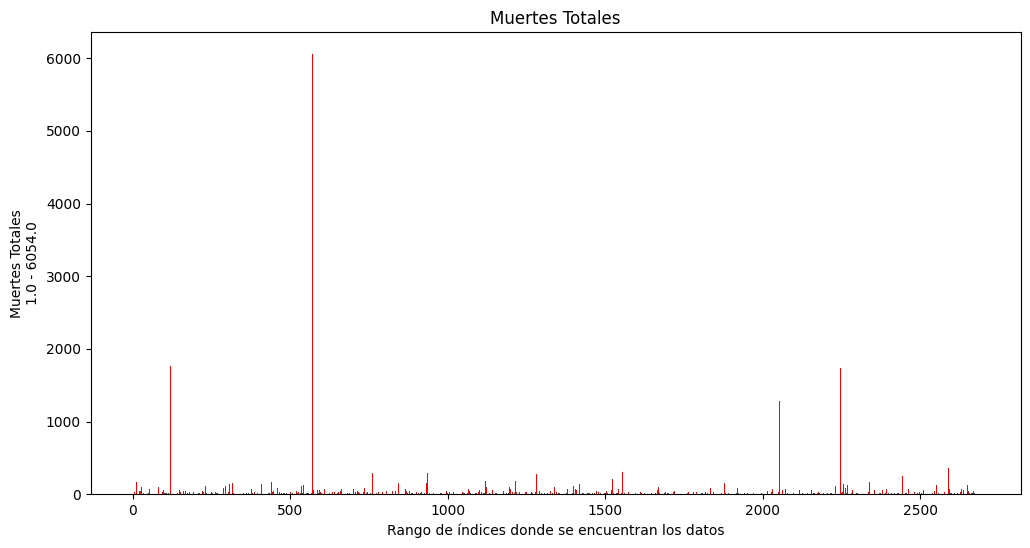

In [ ]:
# Gráfico de Muertes Totales
fig, ax = plt.subplots(figsize=(12, 6))
print(f"Cantidad de datos válidos para Muertes totales: {muertes.count()}")
ax.bar(range(len(muertes)), muertes)
ax.set_title('Muertes Totales')
ax.set_xlabel('Rango de índices donde se encuentran los datos')
ax.set_ylabel(f'Muertes Totales\n{muertes.min()} - {muertes.max()}')
ax.bar(range(len(muertes)), muertes, color='red')
plt.show()

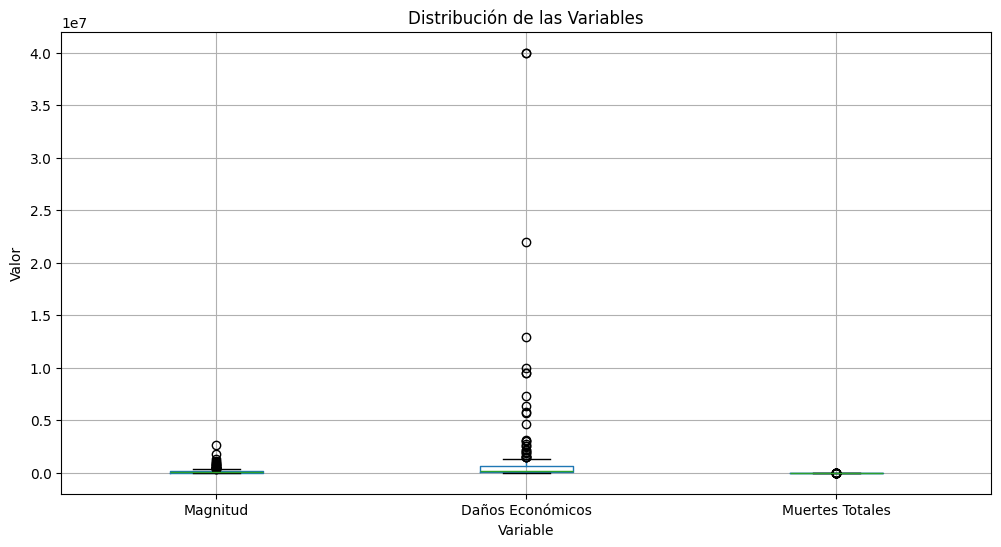

In [ ]:
plt.figure(figsize=(12, 6))
bd.boxplot(column=['Magnitud', 'Daños Económicos', 'Muertes Totales'])
plt.title('Distribución de las Variables')
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.show()

**3.1 Analisis de la Gráfica General de datos:**

Previamente antes del limpiado de datos, podemos observar que para las filas de las 3 columnas de estudio (Magnitud - Daños Económicos, Muertes), existe un gran disparidad de datos a evaluar entre sí (de forma lineal). Por lo que es importante conocer la cantidad de datos que fueron registrados para cada variable predeterminadamente (del archivo de la base de datos original). Y de cuanta data se dispondrá una vez pre-procesados, para tener en cuenta también impacto que supone la nueva información a estudiar.

La precisión de este estudio se encuentra determianda por la uniformidad de los datos de éstas variables, no puede hacerse un estudio para conocer su impacto y comprender las previsiones que deben tomarse ante un desastre si hay datos nulos. Después del limpiado de datos hace una gran diferencia, la cantidad de datos que se tenia previsto trabajar vs la cantidad a trabajar. Si todos éstos datos estuvieran completos sería alrededor de 2.053 filas, que al existir tantos datos nulos entre esas 3 columnas, esa cantidad disminuye hasta 175 filas, pero con datos en todas las filas para las variables a estudiarse.

Esto quiere decir, que hay muchos datos de estos desastres que podrían haber hecho la diferencia en las conclusiones, ya que son alrededor de 1878 filas faltantes, y no quiere decir esto, que no existieron alrededor de 2.053 desastres, sino que son lo que se nos permite estudiar de acuerdo a esas condiciones y garantizar de esta manera la objetividad de la muestra. Gracias a esto es que pudo conocerse y fundamentarse los resultados de las estadisticas.

En general estas son consideraciones que debe tomarse en cuenta para la continudidad de este estudio o futuros estudios de este tipo, las limitaciones externas que enfrenta se encuentra en la propia muestra a utilizarse (valores del archivo de la base de datos) y/o desastre en particular, pudiendo tener o no la cantidad de información esperada.

Además, de la cobertura que nos ofrece la técnología cada día, para poder captar de mejor forma en cada pais, estos sucesos con todos los datos necesarios a estudiar, y de esta manera mejorar en éste tipo de análisis y personalizarlo a tal punto de generar de forma tangible soluciones a la problematicas que enfrentan las comunidades más vulnerables del mundo y después disponerla para que tenga el alcance propuesto.

**3.1.1 Gráfico: Distribución de variables:**

**Magnitud:** La distribución de la magnitud muestra un valor atípico (outlier) con un valor muy alto en comparación al resto de los datos.

**Daños Económicos:** La distribución de los daños económicos presenta un valor atípico, muy por encima del resto de los datos y variablidad, presentando no tanta uniformidad en el resto.

**Muertes Totales:** Se observa una distribución sólo un poco más uniforme, con algunos valores atípicos, se apreciar un valor relativamente alto en comparación con el resto.

**3.2 Gráfica general del archivo de la base de datos no pre-procesada, valores máximos registrado de cada variable por año:**

In [ ]:
magnitud2 = bd2["Magnitud"]
daños2 = bd2["Daños Económicos"]
muertes2 = bd2["Muertes Totales"]
fecha2 = bd2['Año']

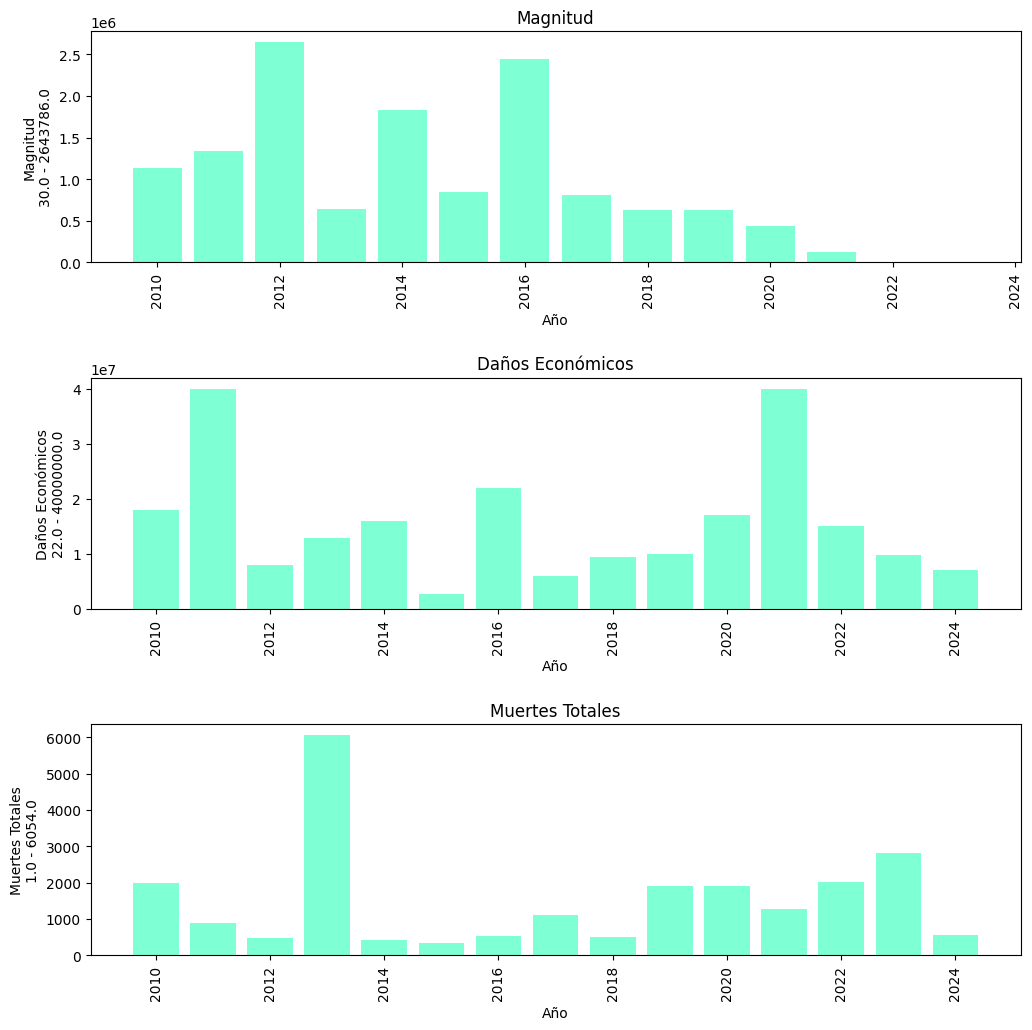

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

# Gráfico de Magnitud
ax1.bar(fecha2, magnitud2)
ax1.set_title('Magnitud')
ax1.set_xlabel('Año')
ax1.set_ylabel(f'Magnitud\n{magnitud2.min()} - {magnitud2.max()}')
ax1.bar(fecha2, magnitud2, color='aquamarine')
ax1.tick_params(axis='x', rotation=90)

# Gráfico de Daños Económicos
ax2.bar(fecha2, daños2)
ax2.set_title('Daños Económicos')
ax2.set_xlabel('Año')
ax2.set_ylabel(f'Daños Económicos\n{daños2.min()} - {daños2.max()}')
ax2.bar(fecha2, daños2, color='aquamarine')
ax2.tick_params(axis='x', rotation=90)

# Gráfico de Muertes Totales
ax3.bar(fecha2, muertes2)
ax3.set_title('Muertes Totales')
ax3.set_xlabel('Año')
ax3.set_ylabel(f'Muertes Totales\n{muertes2.min()} - {muertes2.max()}')
ax3.bar(fecha2, muertes2, color='aquamarine')
ax3.tick_params(axis='x', rotation=90)

plt.subplots_adjust(hspace=0.5)

plt.show()


**3.2 Análisis de gráfica de valores máximos de variables por año:**  
Se cuenta con el periodo completo de estudio 2010 - 2024, y se dispone para cada años los valores del archivo de la base de datos original, pudiendose apreciar las tendecias especifíca de estás variables a lo largo del tiempo, que tanto fue su aumento o descenso en comparación. Además de ponerlos en la misma línea de relación (uno bajo del otro) respecto a las otras variables, y ver de forma paralela su mutua variación. Y como caso en particular, la cantidad de información que se está perdiendo a partir del 2022 en adelante, en la variable magnitud, con respecto al resto.

Esto se realiza con la intensión de reflejar los valores más altos sin ningun tipo filtros, en las variables que se pretendieron estudiar entre sí, para deducir visualmente como puede afectar la ausencia de información en las conclusiones finales, respecto al hecho de que no se haya podido registrar completamente los valores más significativos a lo largo de este periodo de 14 años.

Como tal no se hará enfasis en lo que se puede visualizar de forma particular en las gráficas, por no poder proporcionar la objetividad necesaria que permita poder entrelazar y unificar los resultados. Sin embargo, desde este áspecto, queda como consideración a estudios posteriores que lleguen plantearse la continudad o tomar de referencia los valores y análisis aquí presentes.

**3.3 Gráficos de los patrones que siguen cada una de las variables a lo largo del tiempo 2010 - 2022. Información del archivo de la base de datos pre-procesada:**

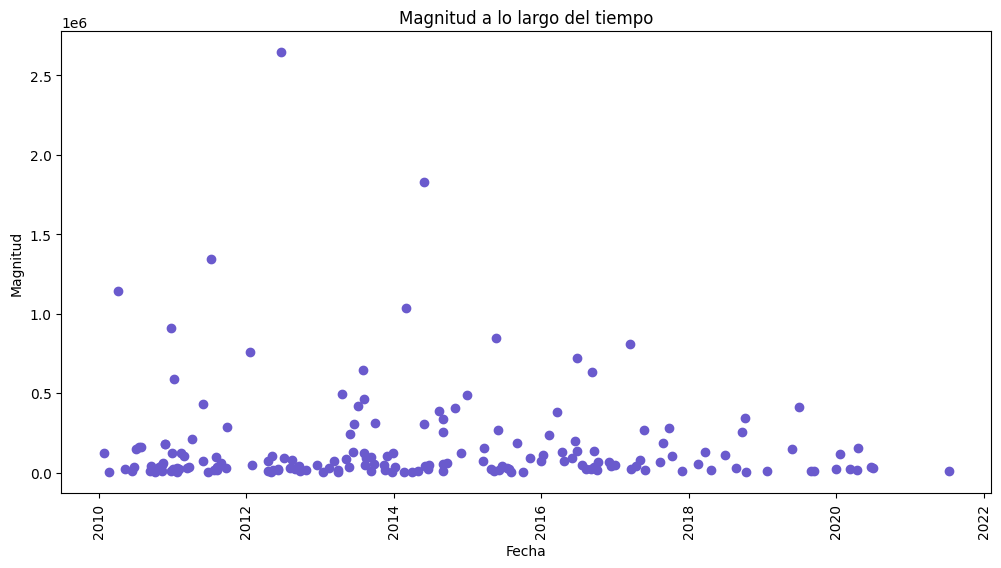

In [ ]:
# Gr# Gráfico de patrones o mejor conocido como gráfico de dispersión de Magnitud a lo largo del tiempo
fig, ax4 = plt.subplots(figsize=(12, 6))
ax4.scatter(bd['Fecha'], bd['Magnitud'], c='#6A5ACD')
ax4.set_title('Magnitud a lo largo del tiempo')
ax4.set_xlabel('Fecha')
ax4.set_ylabel('Magnitud')
ax4.tick_params(axis='x', rotation=90)
plt.show()

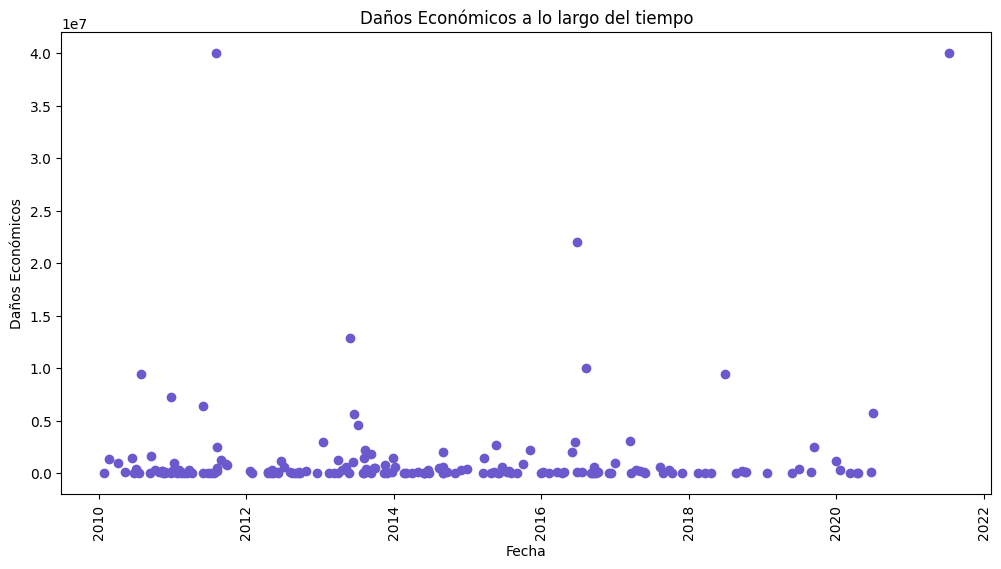

In [ ]:
# Gráfico de patrones de Daños Económicos a lo largo del tiempo
fig, ax5 = plt.subplots(figsize=(12, 6))
ax5.scatter(bd['Fecha'], bd['Daños Económicos'], c='#6A5ACD')
ax5.set_title('Daños Económicos a lo largo del tiempo')
ax5.set_xlabel('Fecha')
ax5.set_ylabel('Daños Económicos')
ax5.tick_params(axis='x', rotation=90)
plt.show()

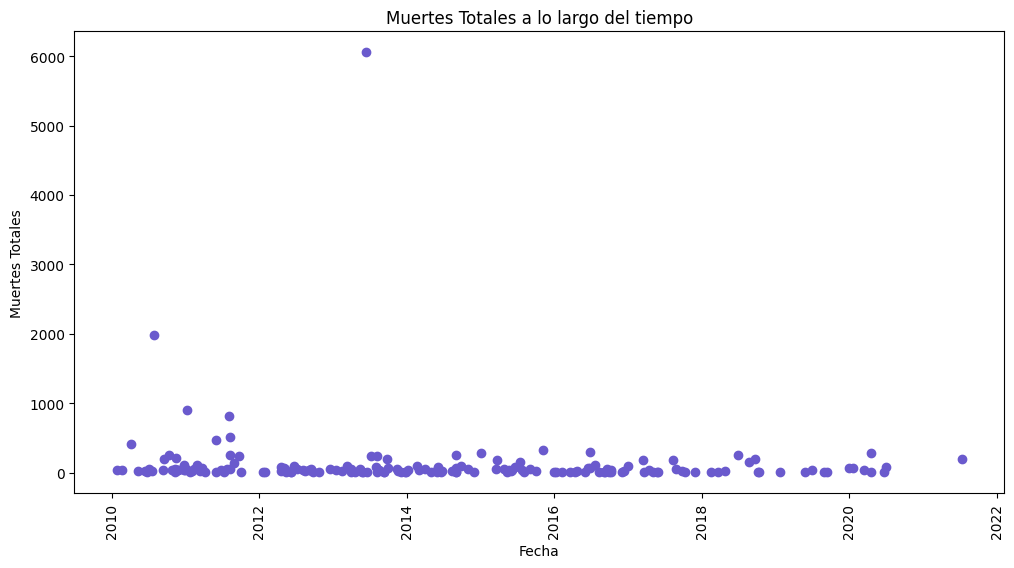

In [ ]:
# Gráfico de patrones de Muertes Totales a lo largo del tiempo
fig, ax6 = plt.subplots(figsize=(12, 6))
ax6.scatter(bd['Fecha'], bd['Muertes Totales'], c='#6A5ACD')
ax6.set_title('Muertes Totales a lo largo del tiempo')
ax6.set_xlabel('Fecha')
ax6.set_ylabel('Muertes Totales')
ax6.tick_params(axis='x', rotation=90)
plt.show()

**3.3 Análisis de los patrones que siguen cada una de las variables a lo largo del tiempo, periodo 2010 - 2022:**

Todo la información anteriores análisis nos va permitir poder comprender y visualizar con mejor base cada uno de los siguientes valores gráficados:

 **Magnitud:** Puede observarse bastante dispersión de estos datos, apreciandose como suben y bajan drásticamente poco menos de la mitad de puntos en la parte superior, aunque también como un monton poco más de la mitad, busca de estabilizarse en su parte más baja. Aunque también no lo suficiente para que estos puntos sigan el mismo nivel entre sí, resultando en un patrón no muy claro de predecir, a pesar de irse cerrando en distacia, pero de igual forma seguir variando, sin estabilizarse de forma notoría. Concretamente con números la mayor magnitud fue de  2.643.786 para el año 2013.

**Daños económicos:** Podría compararse con tener bastante similitud a lo apreciado en magnitud, pero es mas notorio como algunos pocos valores ascienden mucho más, particularmente alrededor de 2012 y 2016. También como predominan los valores bajos y que se estabilizan mucho mejor en la parte inferior, siguiendo una serie o uniformidad bastante cerrada entre sí, aunque ciertas variaciones que visualmente hace notar la discontinuidad. Pero es relevante que tiende a estabilizarse significativamente más en su variación, lo que podría sugerir en general una tendencia de menor impacto económico, respecto a la valores más altos.

**Muertes:** Visualmente en comparación a las gráficas anteriores, puede notarse mucho más como linealmente en el tiempo los patrones se mantiene en un rango bastante alienado, estabilizandose de forma bastante consistente en tendencias que no varian drasticamente entre sí. Hay un aumento notable en el número de muertes en un único punto (alrededor de 2010) que representa 6.054 muertes. Pero la mayoría de los años registra muy pocas muertes (casi siempre inferior a 1000), es por ello la visualización casi tan predecible de esta variable, indicando tal vez una mejora en la gestión de desastres.  


---



Nuevamente es crucial considerar el contexto de cada uno de estos eventos, se observó en detalle como éstas tres variable, si las tratamos de equiparar, seguimos teniendo variaciones, incluso todavía más drásticas, que imposibilitan poder determinar o predecir el impacto, o si quiera disponer de patrones más claros, sobre como se desarrollan y mantienen estos eventos a lo largo de poco más de una década, en las diferentes comunidades del mundo, la cuales cada vez están o deberían de estar más preparadas hoy en día, tras muchisimos años de experiencias acumuladas.

 Por lo que el estudio particularizado de las políticas implementadas, la infraestructura y como puede influir la concientización pública sobre la prevención de desastres, tiene que tomarse muy enserio, para que la infornación que se arroja en este tipo de análisis, pueda aprovecharse de forma precisa y pueda impactar de forma positiva, sobre todo el los sitios que son más vulnerables por las diversas condiciones que les engloba.

**3.4 Gráfica de Evolución de las Variables a lo largo del tiempo: No requerie de análisis, es una forma más explicita de visualizar los anteriores análisis.**

<Figure size 1200x600 with 0 Axes>

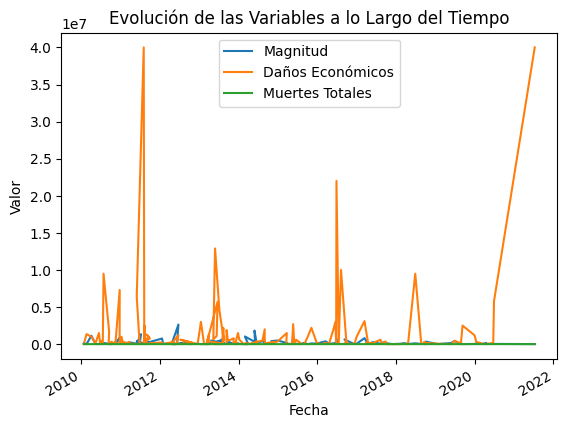

In [ ]:
plt.figure(figsize=(12, 6))
bd.plot(x='Fecha', y=['Magnitud', 'Daños Económicos', 'Muertes Totales'], kind='line')
plt.title('Evolución de las Variables a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

# 3. Análisis de correlación de las variables: Magnitud, Daño Económicos y Total de Fallecidos en desastres hidrológicos (2010-2024)

#### **1. Lectura del archivo a utilizar**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("../database/data_procesada/1_magnitud-dañosEco-Deaths.xlsx")

df.drop(["Unnamed: 0"], axis=1, inplace=True) # Se elimina una columna con datos incoherentes.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   País              175 non-null    object        
 1   Region            175 non-null    object        
 2   Location          175 non-null    object        
 3   Magnitud          175 non-null    float64       
 4   Clasificación     175 non-null    object        
 5   Daños Económicos  175 non-null    int64         
 6   Muertes Totales   175 non-null    int64         
 7   Fecha             175 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 11.1+ KB


In [ ]:
df.head()

,País,Region,Location,Magnitud,Clasificación,Daños Económicos,Muertes Totales,Fecha
0,Mexico,Americas,"Distrito Federal, Mexico city, Michoacan provi...","122,621.00",Hydrological,16000,41,2010-01-26
1,Portugal,Europe,Funchal district (Ilha Da Madera province),483.00,Hydrological,1350000,43,2010-02-20
2,Colombia,Americas,"Sucre, Bolivar, Cordoba, Antioquia, Atlantico,...","1,140,146.00",Hydrological,1000000,418,2010-04-06
3,Sri Lanka,Asia,"Galle, Matara districts (Southern province), R...","19,210.00",Hydrological,105000,28,2010-05-14
4,France,Europe,"Draguignan, Les Arcs, Figanières, Roquebrune s...","7,700.00",Hydrological,1500000,25,2010-06-15


#### **2. Ejemplo de como se correlacionan en un caso real**

En el siguiente ejemplo tenemos dos paises: México y Portugal, podemos notar que la cantidad de fallecidos es similar, ya que uno tiene 41 y el otro 43.
Pero notamos lo siguiente, en los daños económicos hay una pérdida mayor en Portugal (1,350,000), que en México (16,000) y Portugal tiene una Magnitud (483 km^2) menor a la de México (122,621 km^2)

Este es un ejemplo de dos desastres hidrológicos, que ocurrieron en fechas iguales, pero en lugares diferentes, puede notarse una vez más que hay una disparidad significativa en los valores de los datos.

In [ ]:
magnitud_fallecidos_economic_damage = df[["País", "Muertes Totales", "Daños Económicos", "Magnitud", "Fecha"]]
magnitud_fallecidos_economic_damage.head(2)

,País,Muertes Totales,Daños Económicos,Magnitud,Fecha
0,Mexico,41,16000,"122,621.00",2010-01-26
1,Portugal,43,1350000,483.00,2010-02-20


* Aquí tenemos un describe, con las estadísticas del dataframe que generamos

In [ ]:
magnitud_fallecidos_economic_damage.describe()

,Muertes Totales,Daños Económicos,Magnitud,Fecha
count,175.00,175.00,175.00,175
mean,116.55,"1,376,486.54","167,883.22",2014-05-29 12:28:48
min,1.00,176.00,483.00,2010-01-26 00:00:00
25%,9.00,"22,000.00","20,269.00",2012-01-27 00:00:00
50%,32.00,"120,000.00","55,138.95",2013-12-27 00:00:00
75%,67.00,"600,000.00","154,581.55",2016-07-08 12:00:00
max,"6,054.00","40,000,000.00","2,643,786.00",2021-07-12 00:00:00
std,489.56,"4,844,264.63","318,254.76",NaN


#### **3. Gráfica de correlación**

Para evaluar estos datos existe la gráfica de correlación que contiene dos valores claves: el número 1 y el número 0, funcionando de la siguiente manera:

* El número 1: representa la relación entre dos variables total, que son iguales o que están muy relacionadas,
entre más los valores se acerquen al número 1, más relacionadas están.

    En nuestro gráfico hay tres números 1, pero están relacionando o comparando variables del mismo nombre, osea que son iguales, por lo tanto
    esta relación es perfecta entre las variables, porque se comparan a ellas mismas entre sí.

* El número 0: representa la relación de dos variables que son diferentes, entre más cerca del 0 esté una variable menos se relaciona con las demás.
Por ejemplo, si tenemos una correlación de 0,10 quiere decir que tienen una relación débil o casi nula, con la variable que queremos comparar, osea una variable no tiene casi nada de relación con la otra.

Si hicieramos al inicio la siguiente pregunta: ¿Existe una correlación fuerte entre las variables magnitud, daños económicos y total de muertos?
Entonces nuestra primera respuesta hubiera sido la siguiente: Sí, están relacionados, ya que por lógica o sentido común, si un desastre tiene mayor magnitud que otro, tendemos a creer que es más destructivo, que dejará más muertos y que el área afectada tendrá una perdida millonaria. Pero como podemos notar en la gráfica de correlación la respuestas es: No, casi no tienen relación una cosa con la otra, ¿por qué será esto?

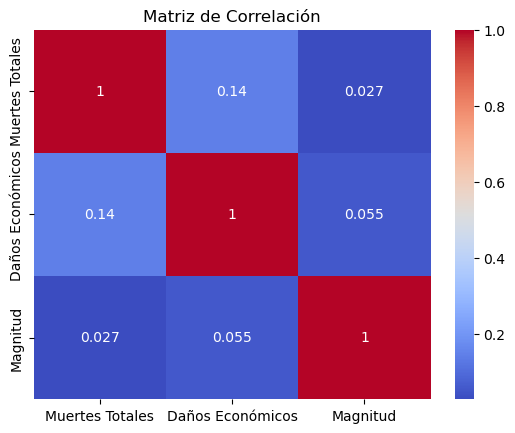

In [ ]:
correlación = df[["Muertes Totales", "Daños Económicos", "Magnitud"]].corr()
sns.heatmap(correlación, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

La correlación de nuestras variables es la siguiente:

* Muertes Totales - Daños Económicos = 0.14.
* Muertes Totales - Magnitud = 0.027.
* Daño Económico - Magnitud = 0.055.

Estas correlaciones según lo que explicamos y como funcionaban significa que la relación entres estas variables está muy cerca al 0, por lo tanto su relación es casi nula o es demasiado débil, pero ¿Por qué exactamente está relación
actua de esa forma? ¿Por qué no tienen tanta relacion entre sí?

Para explicar esto, vamos a volver a nuestro primer ejemplo, donde tenemos lo siguientes datos:

* México: 41 muertes, $16,000 en daños económicos, magnitud de 122,621 km^2
  
* Portugal: 43 muertes, $1,350,000 en daños económicos, magnitud de 483 km^2

In [ ]:
magnitud_fallecidos_economic_damage.head(2)

,País,Muertes Totales,Daños Económicos,Magnitud,Fecha
0,Mexico,41,16000,"122,621.00",2010-01-26
1,Portugal,43,1350000,483.00,2010-02-20


#### **4. Análisis de Correlación:**

* **Muertes Totales - Daños Económicos**: Los dos paises, a pesar de tener una cantidad de fallecidos muy similar, representan un daño
  económico muy diferente. Ésto se interpreta como que el área afectada y lo que contenía como la infraestructura, el valor de los bienes de los
  habitantes y la preparación para los desastres de estas zonas están involucrados para que se arrojen estos resultados.

  En este caso especifíco debemos estudiar la zona afectada de ambos paises, qué tipo de infraestructura contenía en la fecha que fue producido el
  desastre y cómo la frecuencias de inundaciones en estos lugares influyó directamente en la construcción de dicha infraestructura, para minimizar el
  daño económico al mínimo, y ya seria cuestión de profundizar en estos datos y buscar la respuesta para dicho caso.

* **Daño Económico - Magnitud**: Aquí sucede algo parecido al caso anterior, la magnitud del desastre, específicamente en estos tipos de desastre,
  no es un buen predicador del daño económico, debido a que estos dependen de más variables o factores, como lo es la densidad poblacional del área
  afectada, debido a que normalmente si un sitio es propenso a las inundaciones se prepara mejor la infraestructura, hay poco habitantes y se minimiza
  el daño.

* **Muertes Totales - Magnitud**: En este caso la magnitud de nuestro problema se tienen que añadir más factores, no simplemente los fallecidos, esto
  hay que agregarles variables extra, que ya discutimos en los anteriores puntos, densidad poblacional, preparación de la zona afectada, etc. Ya que por
  ejemplo una inundación extensa en un área poco poblada, por lógica no va a causar casi muertes, ya sea porque la población es más fácil de evacuar o
  estan preparados para éste tipo de desastres.

#### **Naturaleza no lineal (Conclusión)**

Este fenómeno, por llamarlo de alguna manera, se titula "naturaleza no lineal", que son sistemas, procesos o relaciones donde las variables
no cambian de manera proporcional entre sí, sino que un pequeño cambio en una variable puede producir un gran efecto en otra, y por lo tanto
es más complejo de analizar que un sistema lineal.

En nuestro caso, los desastres naturales hidrológicos es de naturaleza no lineal ya que gracias a otros factores o variables externas que no tenemos, pueden variar drasticamente los resultados. Por ejemplo, tenemos un umbral que en la magnitud causan grandes cambios en los daños económicos o las muertes, pero debajo de este umbral la relación podría ser mas débil.

Por lo tanto, los resultados que obtenemos al inicio en la correlación, no quieren decir que esten equivocados, sino que nos faltan variables externas para evaluarlo correctamente en su contexto dado.